In [1]:
import os, sys
path = os.path.abspath(os.path.join('..'))
os.chdir(path)
if path not in sys.path:
    sys.path.append(path)

In [2]:
import matplotlib.pyplot as plt
import niceplots
plt.style.use(niceplots.get_style())

from pathlib import Path
from optim import TopOpt, Post2D, Post3D

ANSYS_path = Path("mapdl")
res_dir    = Path("results/mbb/")
mod_dir    = Path("models/")
TopOpt.set_paths(ANSYS_path, res_dir, mod_dir)

# Test case
- Half MBB 168 mm x 80 mm x 8 mm
- Mesh:
    - **2D**: 42 x 20 elements (4 mm element)
    - **3D**: 42 x 20 x 2 elements (4 mm element)
- 1 kN downward force


- Cellulose and 0.5 bamboo
- volfrac = 0.3
- r_rho = 8
- r_theta = 20
- theta0 = -30°
- 100 iterations

In [3]:
# {t/mm^3, MPa, -, kgCO2/kg}
bamboo     = {'rho': 700e-12, 'E': 17.5e3, 'v': 0.04, 'CO2': 1.0565}
cellulose  = {'rho': 990e-12, 'E': 3.25e3, 'v': 0.355, 'CO2': 3.8}
Vfiber  = 0.5

Ex, Ey, nuxy, nuyz, Gxy, rho, CO2mat = TopOpt.rule_mixtures(fiber=bamboo, matrix=cellulose, Vfiber=Vfiber)
CO2veh = 1030 * 25 * 3.83 # kg_fuel/kg_transported/year * years * kgCO2/kg_fuel = kgCO2/kg

In [4]:
solver1 = TopOpt(inputfiles='mbb2d', dim='2D', jobname='2d')
solver1.set_material(Ex=Ex, Ey=Ey, nuxy=nuxy, nuyz=nuxy, Gxy=Gxy)
solver1.set_volfrac(0.3)
solver1.set_filters(r_rho=8, r_theta=20)
solver1.set_initial_conditions('fix', theta0=-30)
solver1.set_optim_options(max_iter=100)
solver1.create_optimizer()

solver1.run()
solver1.save()
solver1.print_timing()

Iteration   0...  c_1 = 34856.4883, 
Iteration   1...  c_1 = 13777.8590, 
Iteration   2...  c_1 =  8531.7460, 
Iteration   3...  c_1 =  6937.9120, 
Iteration   4...  c_1 =  4712.1000, 
Iteration   5...  c_1 =  4810.8883, 
Iteration   6...  c_1 =  4076.5180, 
Iteration   7...  c_1 =  4192.7457, 
Iteration   8...  c_1 =  4204.2856, 
Iteration   9...  c_1 =  4331.5792, 
Iteration  10...  c_1 =  4282.5622, 
Iteration  11...  c_1 =  4283.9163, 
Iteration  12...  c_1 =  4329.4116, 
Iteration  13...  c_1 =  4295.5789, 
Iteration  14...  c_1 =  4315.4405, 
Iteration  15...  c_1 =  4271.2047, 
Iteration  16...  c_1 =  4257.2064, 
Iteration  17...  c_1 =  4233.0153, 
Iteration  18...  c_1 =  4140.5308, 
Iteration  19...  c_1 =  4081.2424, 
Iteration  20...  c_1 =  3976.9809, 
Iteration  21...  c_1 =  3962.5389, 
Iteration  22...  c_1 =  3808.0569, 
Iteration  23...  c_1 =  3818.0990, 
Iteration  24...  c_1 =  3688.9330, 
Iteration  25...  c_1 =  3696.9936, 
Iteration  26...  c_1 =  3664.9057, 
I

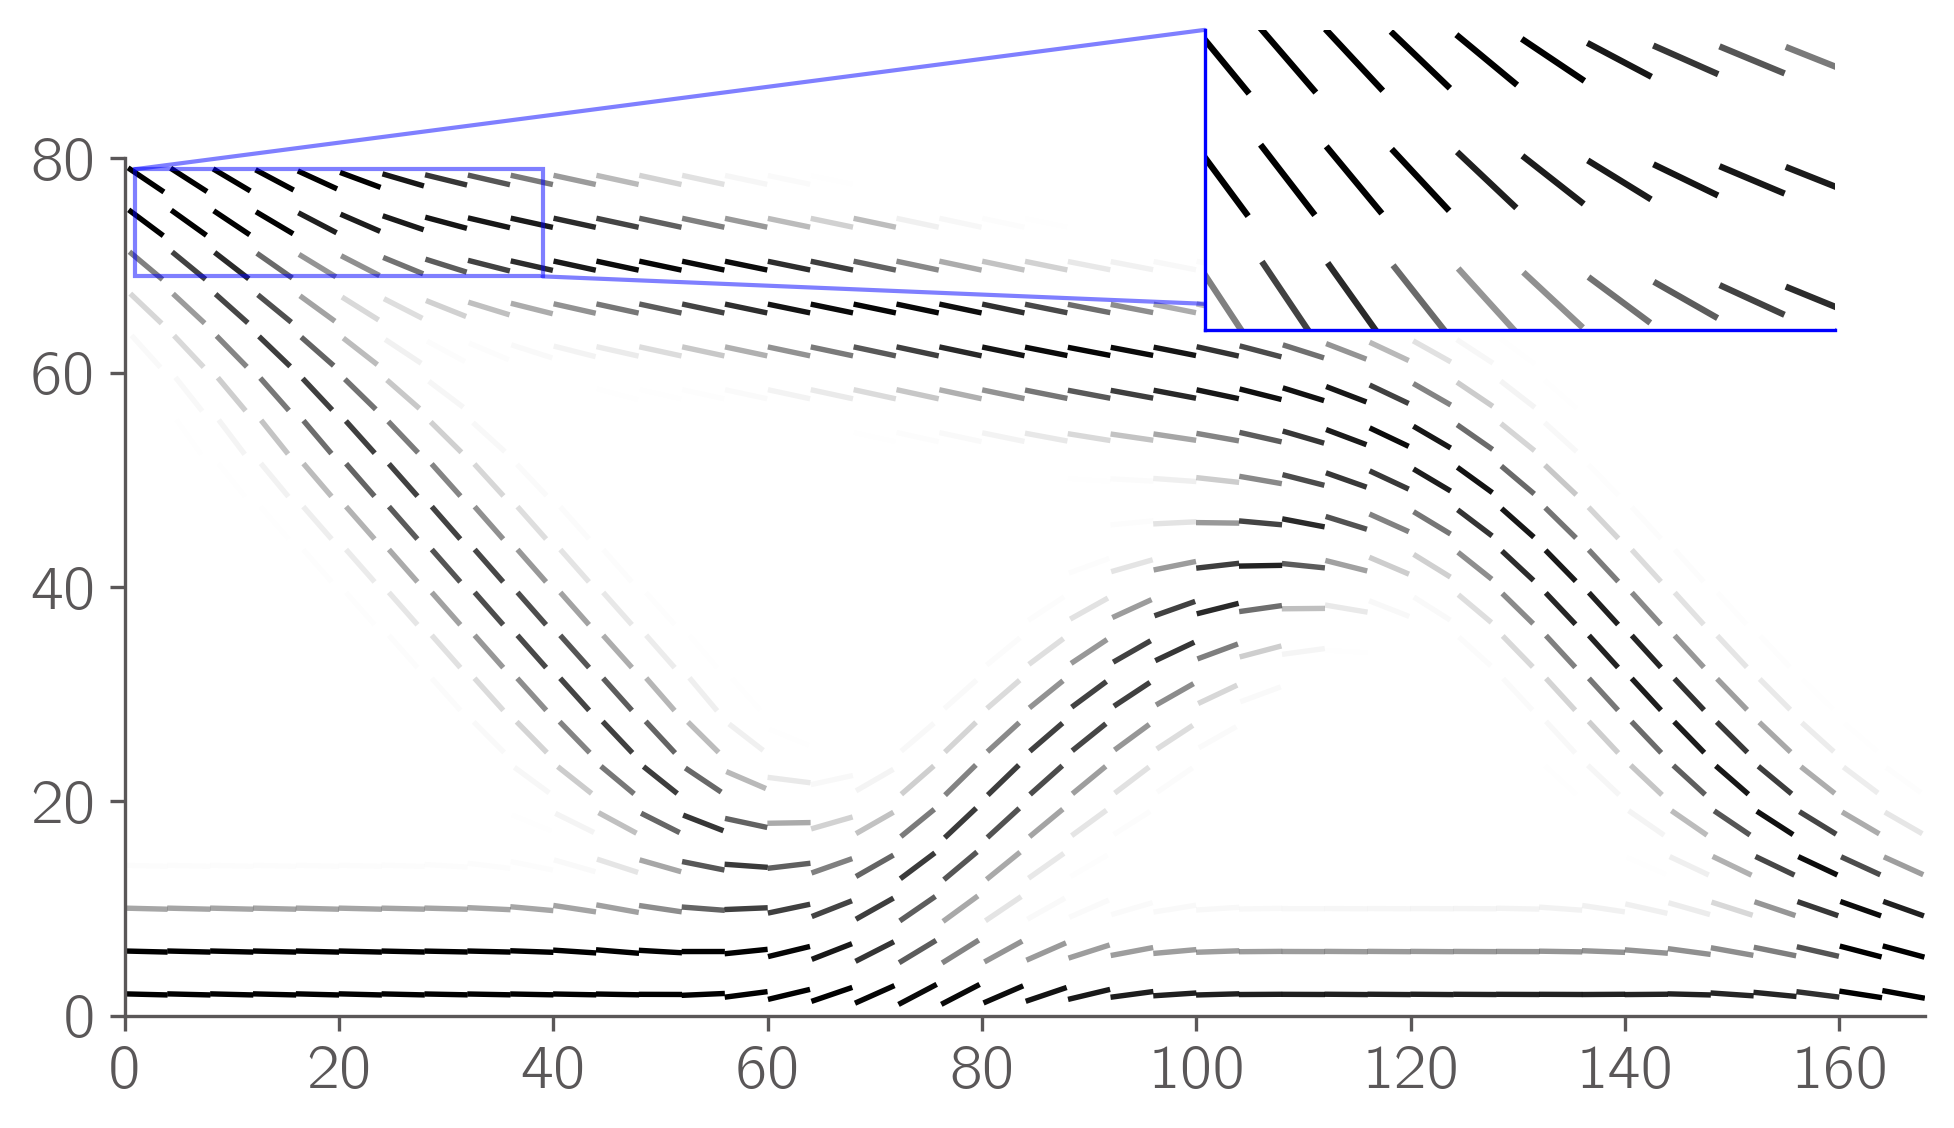

In [5]:
post1 = Post2D(solver1)
zoom = {'xmin': 1, 'xmax': 39,
       'ymin': 69, 'ymax': 79,
       'xpos': 0.6, 'ypos': 0.8,
       'width': 0.35, 'height': 0.35,
       'color': 'blue'}
post1.plot(zoom=zoom)

In [6]:
solver2 = TopOpt(inputfiles='mbb3d', dim='3D_layer', jobname='3d')
solver2.set_material(Ex=Ex, Ey=Ey, nuxy=nuxy, nuyz=nuxy, Gxy=Gxy)
solver2.set_volfrac(0.3)
solver2.set_filters(r_rho=8, r_theta=20)
solver2.set_initial_conditions('fix', theta0=-30)
solver2.set_optim_options(max_iter=100)
solver2.create_optimizer()

solver2.run()
solver2.save()
solver2.print_timing()

Iteration   0...  c_1 = 35711.4655, 
Iteration   1...  c_1 = 13997.1049, 
Iteration   2...  c_1 =  8652.1544, 
Iteration   3...  c_1 =  7003.4546, 
Iteration   4...  c_1 =  4733.4174, 
Iteration   5...  c_1 =  4767.2880, 
Iteration   6...  c_1 =  4133.1501, 
Iteration   7...  c_1 =  4202.3957, 
Iteration   8...  c_1 =  4248.0030, 
Iteration   9...  c_1 =  4369.7363, 
Iteration  10...  c_1 =  4304.5427, 
Iteration  11...  c_1 =  4311.8337, 
Iteration  12...  c_1 =  4333.9581, 
Iteration  13...  c_1 =  4312.9298, 
Iteration  14...  c_1 =  4309.0087, 
Iteration  15...  c_1 =  4279.1240, 
Iteration  16...  c_1 =  4228.9683, 
Iteration  17...  c_1 =  4214.5551, 
Iteration  18...  c_1 =  4102.4764, 
Iteration  19...  c_1 =  4178.0051, 
Iteration  20...  c_1 =  4013.9869, 
Iteration  21...  c_1 =  4051.2234, 
Iteration  22...  c_1 =  3930.6943, 
Iteration  23...  c_1 =  3885.4813, 
Iteration  24...  c_1 =  3826.9580, 
Iteration  25...  c_1 =  3754.2843, 
Iteration  26...  c_1 =  3761.9344, 
I

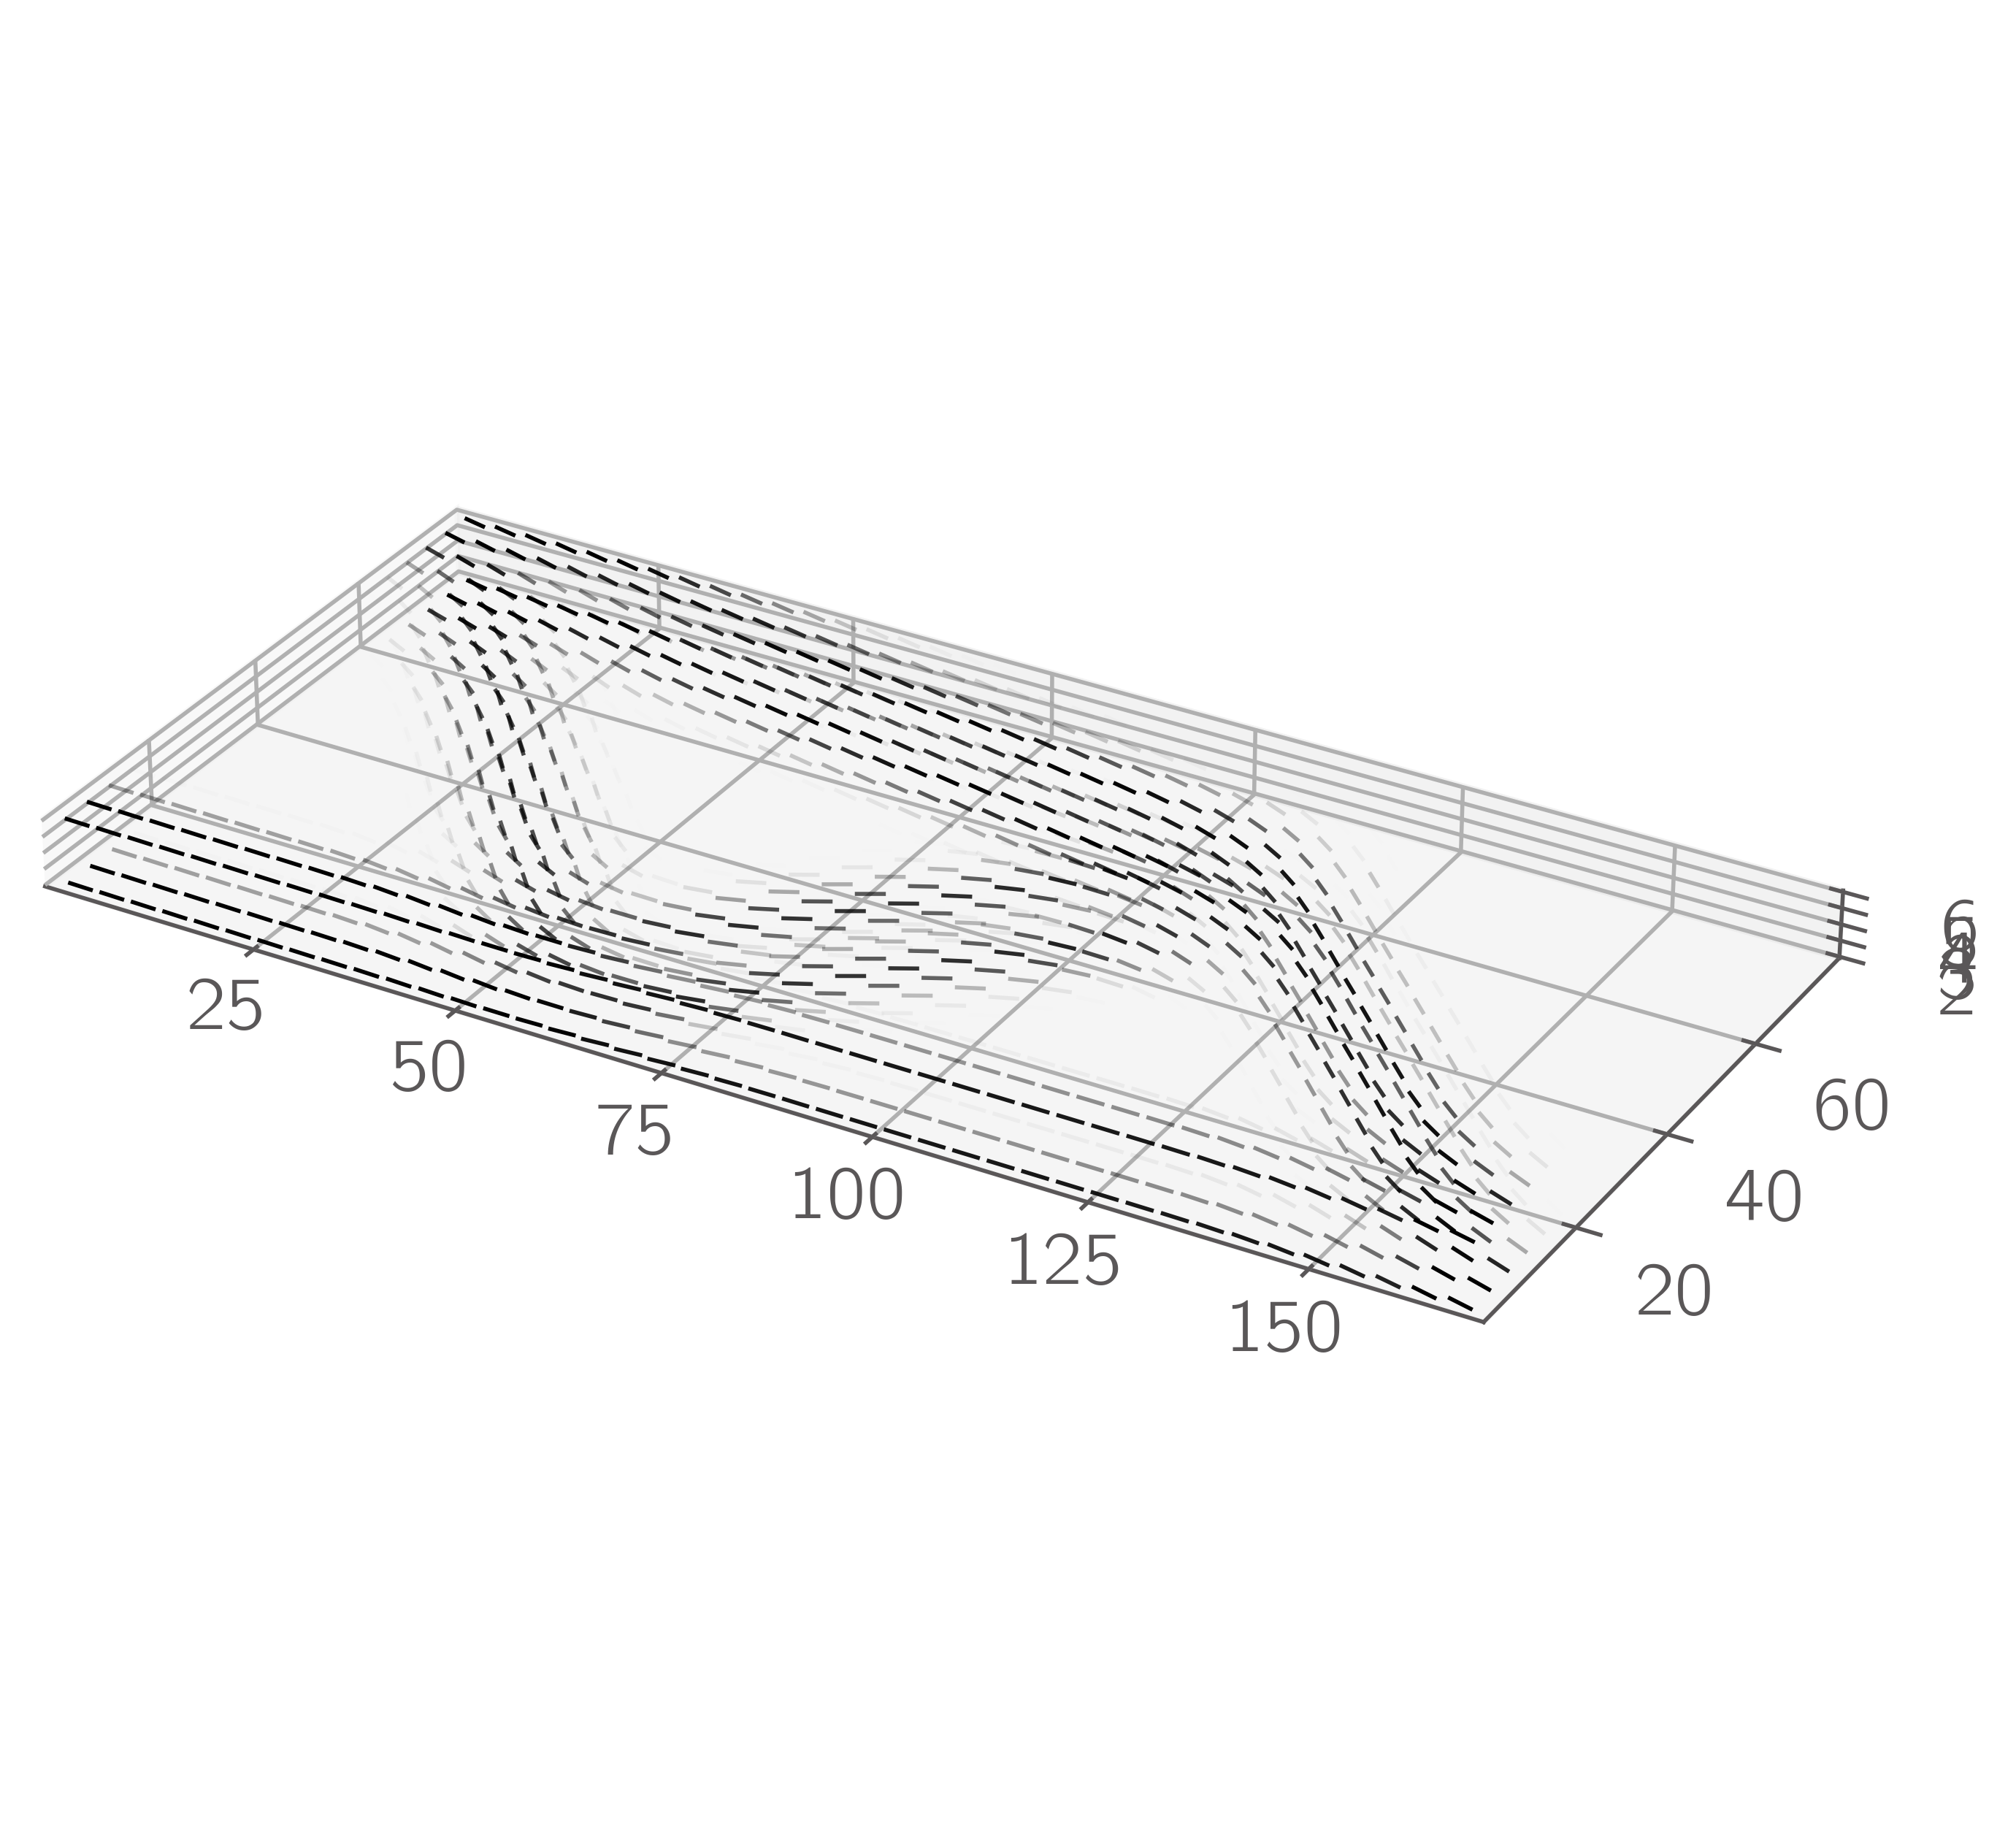

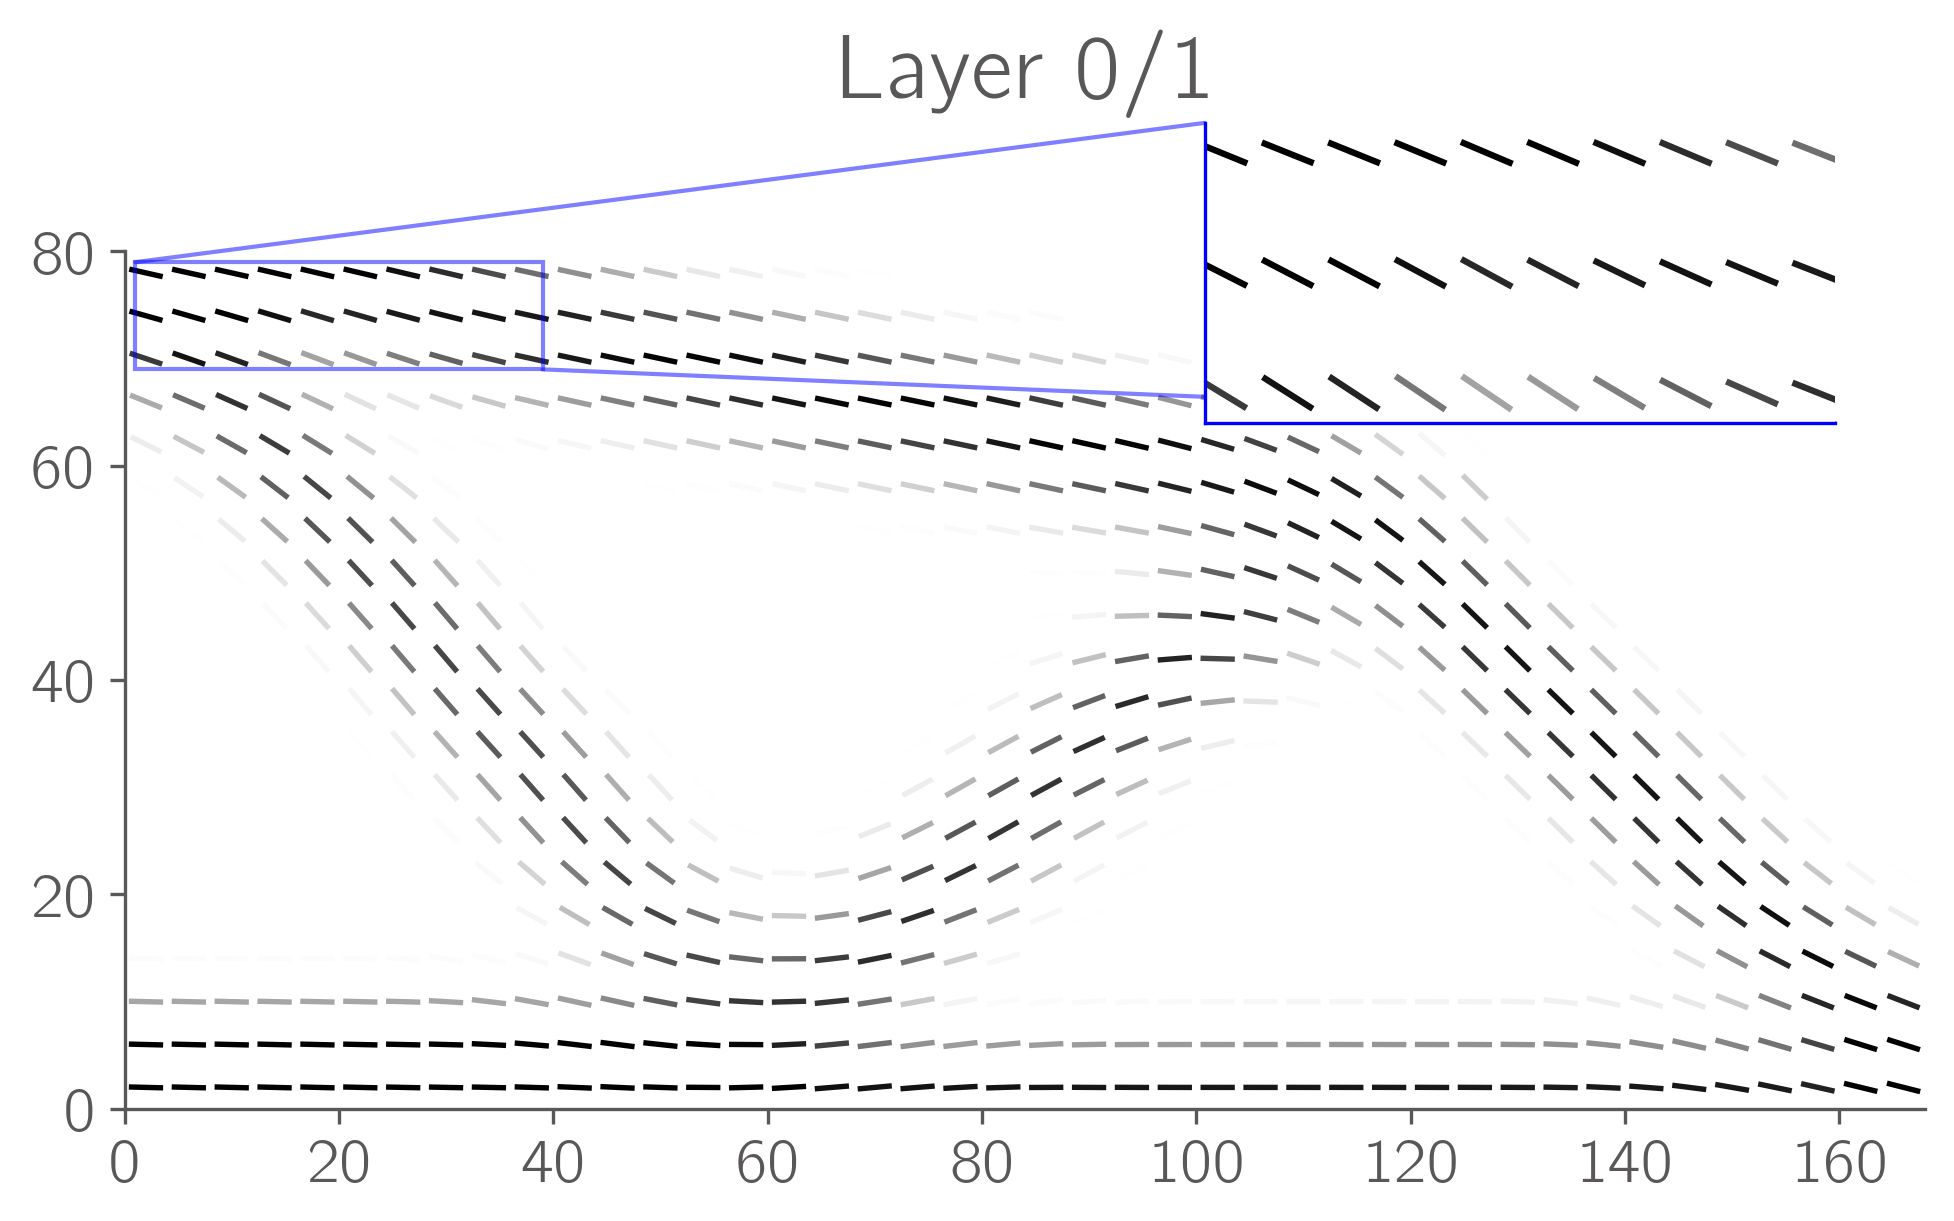

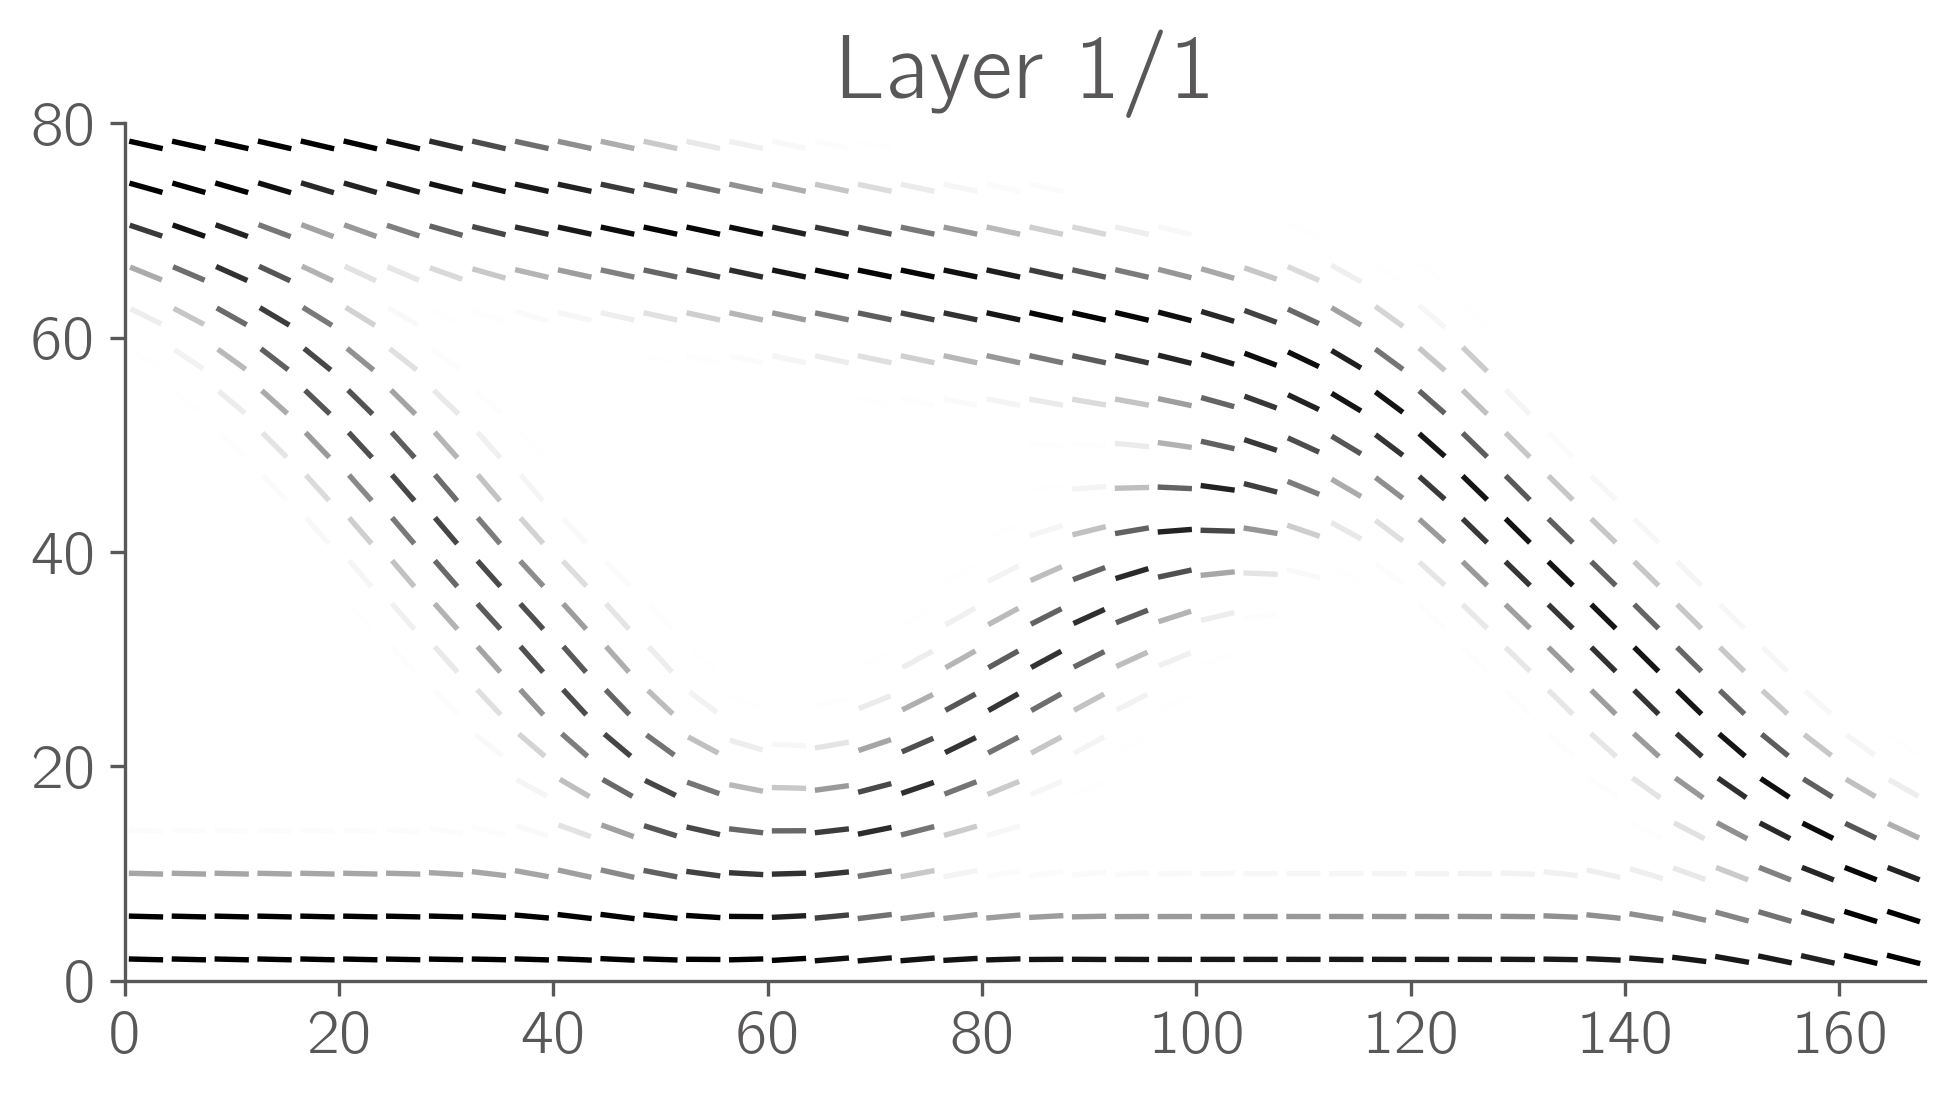

In [9]:
post2 = Post3D(solver2)
post2.plot(colorful=False)
post2.plot_layer(layer=0, zoom=zoom)
post2.plot_layer(layer=1)

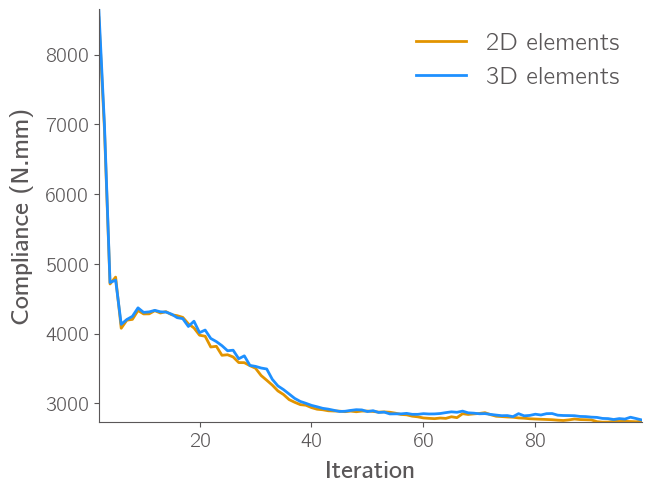

In [10]:
plt.plot(range(2,100), solver1.comp_max_hist[2:100], label='2D elements')
plt.plot(range(2,100), solver2.comp_max_hist[2:100], label='3D elements')
plt.ylabel('Compliance (N.mm)')
plt.xlabel('Iteration')
plt.legend()